In [63]:
import warnings
warnings.filterwarnings('ignore')

In [64]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter

In [65]:
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns

In [66]:
# Load the data
df = pd.read_csv('clean_housing_data.csv') 
df

,Unnamed: 0,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options
0,0,reno / tahoe,1148,apartment,1078,3,2.0,1,1,0,0,0,0,w/d in unit,carport
1,1,reno / tahoe,1813,apartment,1683,2,2.0,1,1,1,0,0,0,w/d in unit,attached garage
2,2,reno / tahoe,1095,apartment,708,1,1.0,1,1,1,0,0,0,w/d in unit,carport
3,3,reno / tahoe,935,apartment,661,1,1.0,1,1,1,0,0,0,laundry on site,off-street parking
4,4,reno / tahoe,1095,apartment,708,1,1.0,1,1,1,0,0,0,w/d in unit,carport
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212183,212183,sacramento,1960,apartment,1198,2,2.0,1,1,1,0,0,0,w/d in unit,carport
212184,212184,reno / tahoe,1295,apartment,957,2,2.0,1,1,1,0,0,0,w/d in unit,carport
212185,212185,reno / tahoe,1249,apartment,840,2,1.0,1,1,1,0,0,0,laundry on site,off-street parking
212186,212186,reno / tahoe,1429,apartment,976,2,2.0,1,1,1,0,0,0,w/d in unit,carport


In [67]:
# Drop first column of dataframe
df = df.iloc[: , 1:]
df

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options
0,reno / tahoe,1148,apartment,1078,3,2.0,1,1,0,0,0,0,w/d in unit,carport
1,reno / tahoe,1813,apartment,1683,2,2.0,1,1,1,0,0,0,w/d in unit,attached garage
2,reno / tahoe,1095,apartment,708,1,1.0,1,1,1,0,0,0,w/d in unit,carport
3,reno / tahoe,935,apartment,661,1,1.0,1,1,1,0,0,0,laundry on site,off-street parking
4,reno / tahoe,1095,apartment,708,1,1.0,1,1,1,0,0,0,w/d in unit,carport
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212183,sacramento,1960,apartment,1198,2,2.0,1,1,1,0,0,0,w/d in unit,carport
212184,reno / tahoe,1295,apartment,957,2,2.0,1,1,1,0,0,0,w/d in unit,carport
212185,reno / tahoe,1249,apartment,840,2,1.0,1,1,1,0,0,0,laundry on site,off-street parking
212186,reno / tahoe,1429,apartment,976,2,2.0,1,1,1,0,0,0,w/d in unit,carport


In [68]:
region_counts=df.region.value_counts()

<AxesSubplot:ylabel='Density'>

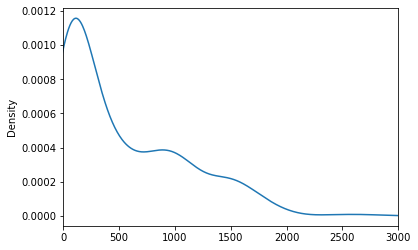

In [69]:
region_counts.plot.density(xlim=[0,3000])

In [70]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df_type = pd.DataFrame(enc.fit_transform(df.type.values.reshape(-1,1)))

# Rename encoded columns
encode_df_type.columns = enc.get_feature_names(['type'])
encode_df_type.head()

,type_apartment,type_house,type_townhouse
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [71]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df_region = pd.DataFrame(enc.fit_transform(df.region.values.reshape(-1,1)))

# Rename encoded columns
encode_df_region.columns = enc.get_feature_names(['region'])
encode_df_region.head()

,region_SF bay area,region_abilene,region_akron / canton,region_albany,region_albuquerque,region_altoona-johnstown,region_amarillo,region_ames,region_anchorage / mat-su,region_ann arbor,...,region_winchester,region_winston-salem,region_worcester / central MA,region_wyoming,region_yakima,region_york,region_youngstown,region_yuba-sutter,region_yuma,region_zanesville / cambridge
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df_laundry = pd.DataFrame(enc.fit_transform(df.laundry_options.values.reshape(-1,1)))

# Rename encoded columns
encode_df_laundry.columns = enc.get_feature_names(['laundry_options'])
encode_df_laundry.head()

,laundry_options_laundry in bldg,laundry_options_laundry on site,laundry_options_no laundry on site,laundry_options_w/d hookups,laundry_options_w/d in unit
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0


In [73]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df_parking = pd.DataFrame(enc.fit_transform(df.parking_options.values.reshape(-1,1)))

# Rename encoded columns
encode_df_parking.columns = enc.get_feature_names(['parking_options'])
encode_df_parking.head()

,parking_options_attached garage,parking_options_carport,parking_options_detached garage,parking_options_no parking,parking_options_off-street parking,parking_options_street parking,parking_options_valet parking
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [74]:
df=df.merge(encode_df_region,left_index=True,right_index=True).drop("region",1)

In [75]:
df=df.merge(encode_df_type,left_index=True,right_index=True).drop("type",1, errors='ignore')

In [76]:
df=df.merge(encode_df_laundry,left_index=True,right_index=True).drop("laundry_options",1, errors='ignore')


In [77]:
df=df.merge(encode_df_parking,left_index=True,right_index=True).drop("parking_options",1, errors='ignore')
df

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,...,laundry_options_no laundry on site,laundry_options_w/d hookups,laundry_options_w/d in unit,parking_options_attached garage,parking_options_carport,parking_options_detached garage,parking_options_no parking,parking_options_off-street parking,parking_options_street parking,parking_options_valet parking
0,1148,1078,3,2.0,1,1,0,0,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1813,1683,2,2.0,1,1,1,0,0,0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1095,708,1,1.0,1,1,1,0,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,935,661,1,1.0,1,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1095,708,1,1.0,1,1,1,0,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212183,1960,1198,2,2.0,1,1,1,0,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
212184,1295,957,2,2.0,1,1,1,0,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
212185,1249,840,2,1.0,1,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
212186,1429,976,2,2.0,1,1,1,0,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [78]:
df.describe()

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,...,laundry_options_no laundry on site,laundry_options_w/d hookups,laundry_options_w/d in unit,parking_options_attached garage,parking_options_carport,parking_options_detached garage,parking_options_no parking,parking_options_off-street parking,parking_options_street parking,parking_options_valet parking
count,212188.000000,212188.000000,212188.000000,212188.000000,212188.000000,212188.000000,212188.000000,212188.000000,212188.000000,212188.000000,...,212188.000000,212188.000000,212188.00000,212188.000000,212188.000000,212188.000000,212188.000000,212188.000000,212188.000000,212188.000000
mean,1222.172116,984.290167,1.878344,1.465905,0.809061,0.778970,0.653892,0.105180,0.017725,0.045441,...,0.011495,0.223523,0.43798,0.158477,0.168662,0.071616,0.008158,0.527584,0.064919,0.000584
std,572.012680,338.140255,0.836628,0.553398,0.393042,0.414942,0.475729,0.306786,0.131950,0.208269,...,0.106595,0.416607,0.49614,0.365189,0.374454,0.257851,0.089952,0.499240,0.246383,0.024167
min,500.000000,250.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,830.000000,750.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1070.000000,944.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1459.000000,1137.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,6000.000000,2500.000000,8.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [79]:
df.columns

Index(['price', 'sqfeet', 'beds', 'baths', 'cats_allowed', 'dogs_allowed',
       'smoking_allowed', 'wheelchair_access', 'electric_vehicle_charge',
       'comes_furnished',
       ...
       'laundry_options_no laundry on site', 'laundry_options_w/d hookups',
       'laundry_options_w/d in unit', 'parking_options_attached garage',
       'parking_options_carport', 'parking_options_detached garage',
       'parking_options_no parking', 'parking_options_off-street parking',
       'parking_options_street parking', 'parking_options_valet parking'],
      dtype='object', length=428)

In [80]:
# Create our features
X= df.drop(columns="price")

# Create our target
y = df['price']

In [81]:
# split data into train and test
# the test set will be 20% of the whole data set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 4)

In [82]:
# instantiate, fit
linreg=linear_model.LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

In [83]:
#print linear regression intercept
linreg.intercept_

123079288118.68503

In [99]:
#print linear regression coef 
linreg.coef_

array([ 5.18462171e-01,  1.10216504e+01,  6.35336665e+01, -1.89345668e+01,
        4.79384183e+01, -7.03430549e+01,  1.10848860e+01,  1.09837167e+02,
        7.56363422e+01, -3.03429789e+08, -3.03431669e+08, -3.03431715e+08,
       -3.03431584e+08, -3.03431617e+08, -3.03431756e+08, -3.03431723e+08,
       -3.03431673e+08, -3.03431414e+08, -3.03431276e+08, -3.03431045e+08,
       -3.03431846e+08, -3.03431393e+08, -3.03431760e+08, -3.03431576e+08,
       -3.03431382e+08, -3.03431752e+08, -3.03431627e+08, -3.03431142e+08,
       -3.03431468e+08, -3.03431258e+08, -3.03431661e+08, -3.03431636e+08,
       -3.03431498e+08, -3.03431175e+08, -3.03431627e+08, -3.03431228e+08,
       -3.03431776e+08, -3.03431695e+08, -3.03431620e+08, -3.03431776e+08,
       -3.03431628e+08, -3.03431803e+08, -3.03431501e+08, -3.03431556e+08,
       -3.03430292e+08, -3.03430954e+08, -3.03431643e+08, -3.03431327e+08,
       -3.03431645e+08, -3.03431786e+08, -3.03431554e+08, -3.03431510e+08,
       -3.03431798e+08, -

In [85]:
y_pred = linreg.predict(X_test)
y_pred

array([1132.48852539, 1344.51049805,  559.86904907, ..., 2111.26757812,
        628.45214844,  749.592453  ])

In [86]:
#comparer prediction with actual values
y_pred[0]

1132.488525390625

In [87]:
y_pred[1]

1344.510498046875

In [88]:
y_test

173767    1033
13122     1358
91056      599
78141      930
207478    1125
          ... 
37819     1085
100398    1004
23056     2000
16245      680
83181      652
Name: price, Length: 42438, dtype: int64

In [90]:
y_pred[0]

1132.488525390625

In [94]:
# mean square error
np.mean(y_pred-y_test)

3.2814646391489037

In [95]:
#RMSE
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

304.97797569030035


we got a root mean squared error of 304.97797569030035 after predicting the house’s rent

In [97]:
from sklearn.metrics import mean_absolute_error
#MAE
mean_absolute_error(y_test, y_pred)

190.3544793183125

In [ ]:
we got a mean absolute error of 190.3544793183125 after predicting the house’s rent